In [1]:
from create_data_single import Circ as cc
from dgcnsuq import DGCN as cn
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = cc(0.4, 0.4, 0.2, 26)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(5, 1, [100], [0.2], True, 10)

In [3]:
import torch
torch.manual_seed(26)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
pc.view(-1, pc.size(-1)).shape

torch.Size([280, 2])

In [5]:
training_data = pc.reshape(-1, pc.size(-1))
test_data = tc[0]
noise_var = 0.01
training_label = noise_var * torch.randn(training_data.size(0))
test_label = torch.Tensor(test_data.size(0))

In [6]:
training_data.shape

torch.Size([280, 2])

In [7]:
model = cn(training_data, test_data, training_label, test_label, False, 2, noise_var)

In [8]:
model.train_kernel(num_epochs=200, batch_size=20, learning_rate=0.00005, print_every=3)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dgcnsuq.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  dist_term = -0.5 * (label - mean).T @ torch.linalg.inv(variance) @ (label - mean)


Epoch:0, Loss: -12.127695901053292
Epoch:3, Loss: -13.904398439527302
Epoch:6, Loss: -14.700423349965115
Epoch:9, Loss: -15.496453074294907
Epoch:12, Loss: -16.319979199438272
Epoch:15, Loss: -17.030381694308883
Epoch:18, Loss: -17.640865295870135
Epoch:21, Loss: -18.325955659227013
Epoch:24, Loss: -19.116305321118343
Epoch:27, Loss: -20.06224707853982
Epoch:30, Loss: -21.17833087840255
Epoch:33, Loss: -22.482415803138842
Epoch:36, Loss: -23.340638447653514
Epoch:39, Loss: -23.709468021789338
Epoch:42, Loss: -23.927518181182354
Epoch:45, Loss: -24.104226668897365
Epoch:48, Loss: -24.24653493474717
Epoch:51, Loss: -24.349425304254265
Epoch:54, Loss: -24.43640590860539
Epoch:57, Loss: -24.516668857972764
Epoch:60, Loss: -24.58644847847783
Epoch:63, Loss: -24.6452919191938
Epoch:66, Loss: -24.6972518139676
Epoch:69, Loss: -24.75027827741039
Epoch:72, Loss: -24.795960273337787
Epoch:75, Loss: -24.835713603697986
Epoch:78, Loss: -24.872188271040024
Epoch:81, Loss: -24.90642611962661
Epoch:8

In [9]:
model.compute_posterior_batch(training_data, training_label, test_data, test_label, True)

(tensor([ 1.3062e-03,  1.7579e-03, -1.8060e-05,  3.5762e-04,  4.1805e-04,
         -4.0965e-04, -1.4127e-04,  5.5873e-04,  1.6669e-03,  1.1884e-03,
          1.7979e-03,  8.8241e-04,  6.6582e-04, -3.6117e-04,  8.0008e-05,
          3.0397e-04,  8.6426e-05,  1.2056e-03,  4.9857e-04, -5.2120e-04,
         -1.9596e-04,  8.1650e-04, -1.4616e-04,  1.2799e-03, -3.9776e-04,
          3.0636e-04,  4.5871e-04,  1.0887e-03,  1.4025e-03, -3.6078e-04,
          1.8293e-03,  1.4663e-04,  1.2399e-03,  6.0291e-04, -1.1716e-04,
         -1.7659e-04,  1.3341e-03,  1.1569e-03, -2.9651e-04,  1.2223e-03,
         -6.2820e-05,  1.3166e-03,  1.5628e-03,  1.8834e-03, -2.7414e-04,
          1.3178e-03,  9.3568e-04, -3.0093e-04,  1.1923e-03,  2.0650e-04,
          1.0905e-03,  1.0408e-03,  2.9578e-04,  6.5184e-04,  2.6678e-04,
          9.6173e-04], grad_fn=<MvBackward0>),
 tensor([[-1.6928e-05, -9.3639e-05, -1.0437e-04,  ..., -1.1653e-04,
          -1.1897e-04, -1.0014e-04],
         [ 3.1519e-04,  4.6605e-04

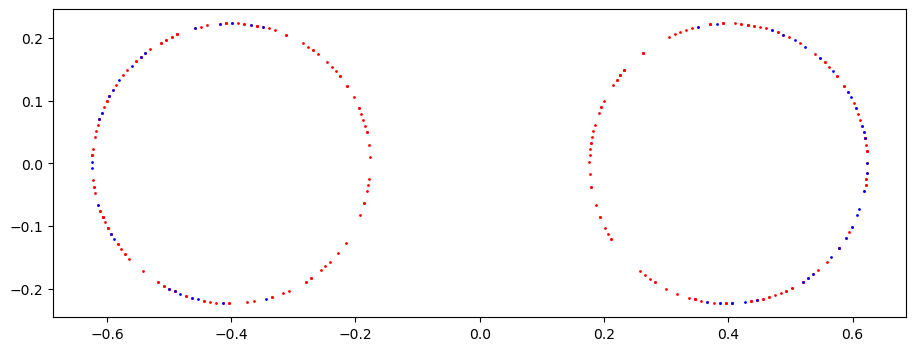

In [10]:
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.scatter(training_data.cpu().numpy()[:, 0], training_data.cpu().numpy()[:, 1], c='r', s=1)
ax.scatter(test_data.cpu().numpy()[:, 0], test_data.cpu().numpy()[:, 1], c='b', s=1)

Text(0.5, 1.0, 'Probability of being on the surface')

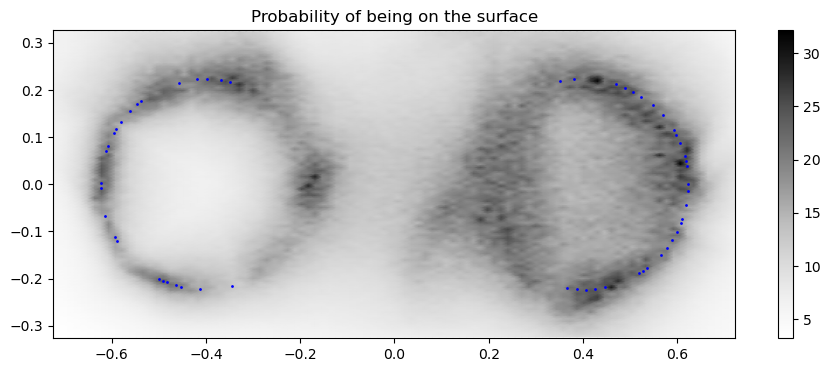

In [11]:
import numpy as np
from scipy.stats import norm
grid_sizes = np.ones(2, dtype=np.int32) * 100
def create_grid(box_min=None, box_max=None, eps=0.1):
    # find the bounding box for all dataset
    if box_min is None:
        box_min = torch.amin(test_data, 0) - eps
    if box_max is None:
        box_max = torch.amax(test_data, 0) + eps

    # Build a grid (dimension-agnostic)
    grid_vertices = np.meshgrid(
        *[np.linspace(box_min[d], box_max[d], grid_sizes[d]) for d in range(2)])
    grid_vertices = np.stack(grid_vertices, axis=-1).reshape(-1, 2)
    grid_vertices = torch.tensor(grid_vertices, dtype=torch.float32)
    return grid_vertices
grid_data = create_grid()
grid_label = torch.Tensor(grid_data.size(0))
training_label = noise_var * torch.randn(test_data.size(0))
pm, pv = model.compute_posterior_batch(test_data, training_label, grid_data, grid_label, True)
pd = torch.diagonal(pv, 0)
with torch.no_grad():
    prob_on_surface = norm.pdf(np.zeros(pm.shape), loc=pm.cpu().detach().numpy(),
                               scale=np.sqrt(pd.cpu().detach().numpy()))
gp = grid_data.cpu().numpy()
gp_x = gp[:, 0].reshape(grid_sizes)
gp_y = gp[:, 1].reshape(grid_sizes)
gp_prob = prob_on_surface.reshape(grid_sizes)

fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
plot = ax.pcolormesh(gp_x, gp_y, gp_prob, shading='gouraud', cmap='Greys')
ax.scatter(test_data.cpu().numpy()[:, 0], test_data.cpu().numpy()[:, 1], c='b', s=1)
fig.colorbar(plot)
ax.axis('equal')
ax.set_title(f'Probability of being on the surface')